# Código del algoritmo k-means

### Librerias importadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Algoritmo k-means

In [39]:
def encuentra_centro_mas_cercano(X, centros):
  """
  Calcula el centro más cercano de cada ejemplo de X
  
  Parámetros:
    X (ndarray): (m,n) Conjunto de datos
    centros (ndarray): K centros

  Devuelve:
    idx (ndarray): (m,) Array que contiene el índice del centro que le corresponde a cada punto
  """
  
  K = centros.shape[0]
  idx = np.zeros(X.shape[0], dtype=int)

  for i in range(X.shape[0]):
    distancias = [np.linalg.norm(X[i] - centros[j]) for j in range(K)]
    idx[i] = np.argmin(distancias)

  return idx

def calcula_centros(X, idx, K):
  """
  Calcula los nuevos centros con la media de los ejemplos que han sido asignados a dichos centros

  Parámetros:
    X (ndarray): (m,n) Conjunto de datos
    idx (ndarray): (m,) Array que contiene el índice del centro que le corresponde a cada punto
    K (int): Número de centros

  Devuelve:
    centros (ndarray): (K,n) Nuevos centros calculados
  """

  m,n = X.shape
  centros = np.zeros((K,n))

  for i in range(K):
    puntos = X[idx==i]
    if(np.size(puntos) != 0):
      centros[i] = np.mean(puntos, axis=0)

  return centros

def calcula_centros_iniciales(X, K):
  """
  Calcula de forma aleatoria los centros

  Parámetros:
    X (ndarray): (m,n) Conjunto de datos
    K (int): Número de centros

  Devuelve:
    centros (ndarray): (K,n) Centros iniciales
  """

  # Barajamos los índices de forma aleatoria
  randid = np.random.permutation(X.shape[0])

  #Tomamos los K primeros ejemplos como centros
  centros = X[randid[:K]]

  return centros

def run_kMeans(X, K, max_iters=10):
  """
  Corre el algoritmo de k-Means

  Parámetros:
    X (ndarray): (m,n) Conjunto de datos
    K (int): Número de centros
    max_iters (int): Número máximo de iteraciones del algoritmo

  Devuelve:
    centros (ndarray): (K,n) Centros finales
    idx (ndarray): (m,) Array que contiene el índice del centro que le corresponde a cada punto
  """

  centros = calcula_centros_iniciales(X, K)
  centros_anteriores = centros

  for i in range(max_iters):
    print(f"Iteración de k-means: {i+1}/{max_iters}")
    
    #Asignamos a cada ejemplo en X, el centro más cercano
    idx = encuentra_centro_mas_cercano(X, centros)

    #Calculamos los nuevos_centros
    centros = calcula_centros(X, idx, K)

    if((centros == centros_anteriores).all()):
      break
    else:
      centros_anteriores = centros

  return centros, idx

# Visualización de imagen

### Visualización imagen original (Modificar celda)

Forma de la imagen original: (300, 300, 3)


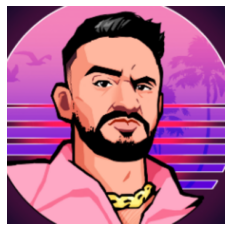

In [60]:
# Escribir nombre de la imagen 
# (RECOMENDACIÓN: elegir una imagen con dimensiones pequeñas, como 300x300, sino el algoritmo tarda demasiado)
ruta_imagen = "illojuan.png"

original_img = plt.imread(ruta_imagen)
plt.imshow(original_img)
plt.axis('off')

print(f"Forma de la imagen original: {original_img.shape}")

### Cálculo de la nueva imagen

In [76]:
# Número de colores que tendrá la imagen
K = 16

max_iters = 10
X_img = np.reshape(original_img/255, (original_img.shape[0]*original_img.shape[1], 3))

# Centros finales y indice del centro que le pertenece a cada pixel
centros, idx = run_kMeans (X_img, K, max_iters)

# Matriz en formato original con los valores de los pixeles en función del centro asignado
X_recovered = np.reshape(centros[idx, :], original_img.shape)

# Compruebo si los centros son menores que 0.1 debido a los diferentes formatos de imagenes
# En formatos como png, los pixeles tienen valores menores que 0.1
if(np.all(centros<=0.1)):
  pixelArt_img = X_recovered*255

# En formatos como webp, los pixeles tienen decimales, de forma que hay que convertirlo a INT
else:
  pixelArt_img = np.round(X_recovered*255).astype(int)

Iteración de k-means: 1/10
Iteración de k-means: 2/10
Iteración de k-means: 3/10
Iteración de k-means: 4/10
Iteración de k-means: 5/10
Iteración de k-means: 6/10
Iteración de k-means: 7/10
Iteración de k-means: 8/10
Iteración de k-means: 9/10
Iteración de k-means: 10/10


### Comparación de imagenes: Original - Pixel Art

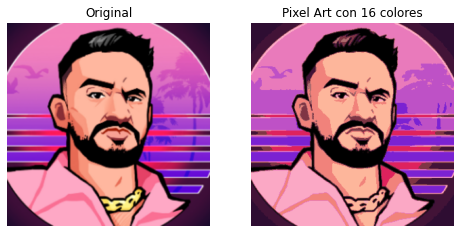

In [77]:
fig,ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(pixelArt_img)
ax[1].set_title(f'Pixel Art con {K} colores')
ax[1].set_axis_off()

### Visualización imagen Pixel Art

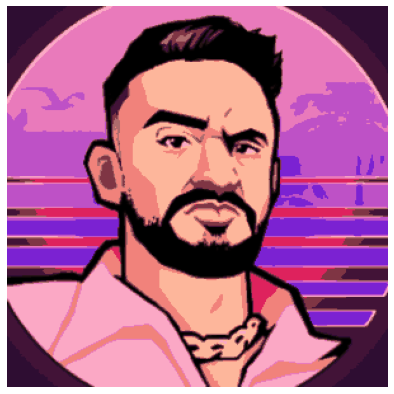

In [78]:
plt.figure(figsize=(7,7))
plt.imshow(pixelArt_img)
plt.axis('off')
plt.show()